In [1]:
pwd

'/additional_drive/ibrar/MVP'

In [9]:
import json
import pandas as pd

with open('release_conditions.json', 'r') as conditions_file:
    conditions_data = json.load(conditions_file)

with open('release_evidences.json', 'r') as evidences_file:
    evidences_data = json.load(evidences_file)

test_patients_data = pd.read_csv('release_test_patients.csv')
train_patients_data = pd.read_csv('release_train_patients.csv')
validate_patients_data = pd.read_csv('release_validate_patients.csv')




In [72]:
print("Conditions Data (First 3 entries):")
for key in list(conditions_data.keys())[:100]:
    print(key, ":", conditions_data[key])
    print("==============****************=================")
print("===========================================================")
print("\nEvidences Data (First 3 entries):")
for key in list(evidences_data.keys())[:5]:
    print(key, ":", evidences_data[key])
    print("==============****************=================")

print("===========================================================")
print("\nTest Patients Data (First 5 rows):")
print(test_patients_data.head())

print("===========================================================")
print("\nTrain Patients Data (First 5 rows):")
print(train_patients_data.head())

print("===========================================================")
print("\nValidate Patients Data (First 5 rows):")
print(validate_patients_data.head())

Conditions Data (First 3 entries):
Pneumothorax spontané : {'condition_name': 'Pneumothorax spontané', 'cond-name-fr': 'Pneumothorax spontané', 'cond-name-eng': 'Spontaneous pneumothorax', 'icd10-id': 'J93', 'symptoms': {'douleurxx_endroitducorps': {}, 'douleurxx': {}, 'douleurxx_irrad': {}, 'douleurxx_carac': {}, 'douleurxx_soudain': {}, 'douleurxx_intens': {}, 'douleurxx_precis': {}, 'dyspn': {}, 'ww_respi': {}, 'ww_effort': {}, 'angor_repos': {}, 'oedeme': {}}, 'antecedents': {'f17.210': {}, 'pneumothorax': {}, 'ap_pneumothorax': {}, 'j44_j42': {}, 'trav1': {}}, 'severity': 2}
==============****************=================
Céphalée en grappe : {'condition_name': 'Céphalée en grappe', 'cond-name-fr': 'Céphalée en grappe', 'cond-name-eng': 'Cluster headache', 'icd10-id': 'g44.009', 'symptoms': {'douleurxx_endroitducorps': {}, 'douleurxx': {}, 'douleurxx_irrad': {}, 'douleurxx_carac': {}, 'douleurxx_soudain': {}, 'douleurxx_intens': {}, 'douleurxx_precis': {}, 'larmes': {}, 'rhino_cla

In [77]:
import pandas as pd
import json

with open('release_conditions.json', 'r') as conditions_file:
    release_conditions_data = json.load(conditions_file)
    
    
pathology_list = []

for key, value in release_conditions_data.items():
    pathology_dict = {
        'condition_name': value['condition_name'],
        'cond_name_fr': value['cond-name-fr'],
        'cond_name_eng': value['cond-name-eng'],
        'icd10_id': value['icd10-id'],
        'severity': value['severity'],
        'symptoms': list(value['symptoms'].keys()), 
        'antecedents': list(value['antecedents'].keys()), 
    }
    pathology_list.append(pathology_dict)

pathology_df = pd.DataFrame(pathology_list)

pathology_df.head()


,condition_name,cond_name_fr,cond_name_eng,icd10_id,severity,symptoms,antecedents
0,Pneumothorax spontané,Pneumothorax spontané,Spontaneous pneumothorax,J93,2,"[douleurxx_endroitducorps, douleurxx, douleurx...","[f17.210, pneumothorax, ap_pneumothorax, j44_j..."
1,Céphalée en grappe,Céphalée en grappe,Cluster headache,g44.009,3,"[douleurxx_endroitducorps, douleurxx, douleurx...","[atcd_cluster, f10.129, rx_vasodil, trav1]"
2,Syndrome de Boerhaave,Syndrome de Boerhaave,Boerhaave,K22.3,2,"[douleurxx_endroitducorps, douleurxx, douleurx...","[f10.129, trav1]"
3,Fracture de côte spontanée,Fracture de côte spontanée,Spontaneous rib fracture,S22.9,3,"[douleurxx_endroitducorps, douleurxx, douleurx...","[f10.129, cancer_méta, osteoporose, trav1]"
4,RGO,RGO,GERD,K21,3,"[pyrosis, toux, ww_bouffe, douleurxx_endroitdu...","[e66, preg1, j45, f10.129, f17.210, hernie_hia..."


In [85]:
pathology_df['symptoms'][1]

['douleurxx_endroitducorps',
 'douleurxx',
 'douleurxx_irrad',
 'douleurxx_carac',
 'douleurxx_soudain',
 'douleurxx_intens',
 'douleurxx_precis',
 'larmes',
 'rhino_clair',
 'rds_paralys_gen']

In [79]:
import pandas as pd
import json

with open('release_evidences.json', 'r') as evidences_file:
    release_evidences_data = json.load(evidences_file)

evidence_list = []

for key, value in release_evidences_data.items():
    evidence_dict = {
        'name': value['name'],
        'code_question': value['code_question'],
        'question_fr': value['question_fr'],
        'question_en': value['question_en'],
        'is_antecedent': value['is_antecedent'],
        'data_type': value['data_type'],
        'default_value': value['default_value'],
        'possible_values': value.get('possible-values', None),
        'value_meaning': value.get('value_meaning', None),
    }
    evidence_list.append(evidence_dict)
evidence_df = pd.DataFrame(evidence_list)
evidence_df.head()


,name,code_question,question_fr,question_en,is_antecedent,data_type,default_value,possible_values,value_meaning
0,fievre,fievre,Avez-vous objectivé ou ressenti de la fièvre?,Do you have a fever (either felt or measured w...,False,B,0,[],{}
1,douleurxx_endroitducorps,douleurxx,Avez-vous de la douleur quelque part?,Do you feel pain somewhere?,False,M,nulle_part,"[nulle_part, aile_iliaque_D_, aile_iliaque_G_,...","{'nulle_part': {'fr': 'nulle part', 'en': 'now..."
2,douleurxx,douleurxx,Avez-vous de la douleur à quelque part en lien...,"Do you have pain somewhere, related to your re...",False,B,0,[],{}
3,douleurxx_irrad,douleurxx,Est-ce que la douleur se propage vers un autre...,Does the pain radiate to another location?,False,M,nulle_part,"[nulle_part, aile_iliaque_D_, aile_iliaque_G_,...","{'nulle_part': {'fr': 'nulle part', 'en': 'now..."
4,douleurxx_carac,douleurxx,Caractérisez votre douleur:,Characterize your pain:,False,M,NA,"[NA, déchirante, lancinante_/_choc_électrique,...","{'NA': {'fr': 'NA', 'en': 'NA'}, 'déchirante':..."


In [83]:
evidence_df['name'][0]

'fievre'

In [44]:
test_patients_data.head() # release_conditions    |  # release_evidences 
# patient ID, pathology name

,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE
0,49,"[['Bronchite', 0.20230062181160519], ['RGO', 0...",F,RGO,"['douleurxx', 'douleurxx_carac_@_lancinante_/_...",toux
1,2,"[['Asthme exacerbé ou bronchospasme', 0.080220...",M,Bronchite,"['douleurxx', 'douleurxx_carac_@_une_brûlure_o...",douleurxx
2,49,"[['Réaction dystonique aïgue', 0.6267050848165...",M,Réaction dystonique aïgue,"['antipsy_récent', 'laryngospasme', 'nau_psy_r...",laryngospasme
3,64,"[['Bronchite', 0.2748608320637265], ['Laryngit...",M,Laryngite aigue,"['crowd', 'dayc', 'douleurxx', 'douleurxx_cara...",douleurxx
4,70,"[['IVRS ou virémie', 0.21257615919851483], ['P...",F,IVRS ou virémie,"['contact', 'diaph', 'douleurxx', 'douleurxx_c...",toux


In [71]:
test_patients_data['EVIDENCES'][3]

"['crowd', 'dayc', 'douleurxx', 'douleurxx_carac_@_une_brûlure_ou_chaleur', 'douleurxx_endroitducorps_@_amygdale_D_', 'douleurxx_endroitducorps_@_amygdale_G_', 'douleurxx_endroitducorps_@_pharynx', 'douleurxx_intens_@_2', 'douleurxx_irrad_@_nulle_part', 'douleurxx_precis_@_4', 'douleurxx_soudain_@_4', 'f17.210', 'fievre', 'toux', 'trav1_@_N', 'volume_parole']"

In [73]:
train_patients_data.head(20)

,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE
0,18,"[['Bronchite', 0.19171203430383882], ['Pneumon...",M,IVRS ou virémie,"['crowd', 'diaph', 'douleurxx', 'douleurxx_car...",fievre
1,21,"[['VIH (Primo-infection)', 0.5189500564407601]...",M,VIH (Primo-infection),"['adp_dlr', 'atcd_its', 'diaph', 'diarrhee', '...",diaph
2,19,"[['Bronchite', 0.11278064619119596], ['Pneumon...",F,Pneumonie,"['douleurxx', 'douleurxx_carac_@_un_coup_de_co...",expecto
3,34,"[['IVRS ou virémie', 0.23859396799565236], ['C...",F,IVRS ou virémie,"['crowd', 'douleurxx', 'douleurxx_carac_@_une_...",douleurxx
4,36,"[['IVRS ou virémie', 0.23677812769175735], ['P...",M,IVRS ou virémie,"['dayc', 'diaph', 'douleurxx', 'douleurxx_cara...",toux
5,37,"[['Rhinosinusite aigue', 0.2575738638873495], ...",F,Rhinosinusite chronique,"['douleurxx', 'douleurxx_carac_@_une_brûlure_o...",douleurxx
6,43,"[['Bronchite', 0.24726070382402293], ['Laryngi...",M,Pharyngite virale,"['contact', 'dayc', 'douleurxx', 'douleurxx_ca...",douleurxx
7,39,"[['Anémie', 0.35566843677250953], ['Anaphylaxi...",M,Anémie,"['Mauv_aliment', 'atcd_anem', 'douleurxx', 'do...",fatig_ext
8,30,"[['Bronchite', 0.33250589804545644], ['Rhinosi...",M,Rhinosinusite chronique,"['douleurxx', 'douleurxx_carac_@_vive', 'doule...",douleurxx
9,49,"[['TSVP', 0.14665916736864038], ['Anémie', 0.1...",M,Fibrillation auriculaire/Flutter auriculaire,"['ap_hypert4', 'ap_valve', 'bode', 'dyspn', 'e...",dyspn


In [13]:
validate_patients_data.head()

,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE
0,55,"[['Anémie', 0.25071110167158567], ['Fibrillati...",F,Anémie,"['Mauv_aliment', 'atcd_anem', 'atcd_fam_anem',...",pale
1,10,"[['Syndrome de Guillain-Barré', 0.135558991316...",F,Attaque de panique,"['anxiete_s', 'atcdpsyfam', 'diaph', 'douleurx...",psy_depers
2,68,[['Possible influenza ou syndrome virémique ty...,F,Possible influenza ou syndrome virémique typique,"['diaph', 'douleurxx', 'douleurxx_carac_@_une_...",douleurxx
3,13,"[['Anémie', 0.18697604010451876], ['Fibrillati...",M,Anémie,"['Mauv_aliment', 'atcd_anem', 'atcd_fam_anem',...",douleurxx
4,48,"[['Syndrome de Boerhaave', 1.0]]",M,Syndrome de Boerhaave,"['douleurxx', 'douleurxx_carac_@_déchirante', ...",douleurxx


In [74]:
import pandas as pd

# Assuming train_patients_data is your DataFrame
unique_pathologies = train_patients_data['PATHOLOGY'].value_counts()

# Display the total number of unique pathologies
print("Total Unique Pathologies:", len(unique_pathologies))

# Display all unique pathology names and their counts
for pathology, count in unique_pathologies.items():
    print(f"{pathology}: {count}")


Total Unique Pathologies: 49
IVRS ou virémie: 64368
Pharyngite virale: 61642
Anémie: 50665
VIH (Primo-infection): 29013
Oedème localisé ou généralisé sans atteinte pulmonaire associée: 27825
Anaphylaxie: 27718
Embolie pulmonaire: 27468
Possible influenza ou syndrome virémique typique: 26812
Bronchite: 26400
Rhinite allergique: 26203
Réaction dystonique aïgue: 25982
RGO: 25979
Otite moyenne aigue (OMA): 25917
Pneumonie: 25761
Attaque de panique: 25019
Laryngite aigue: 24129
Syndrome de Guillain-Barré: 22867
Péricardite: 22785
Sarcoïdose: 21285
Possible NSTEMI / STEMI: 21260
Angine instable: 21244
Fibrillation auriculaire/Flutter auriculaire: 21036
Céphalée en grappe: 20804
Rhinosinusite chronique: 20579
Hernie inguinale: 20235
Asthme exacerbé ou bronchospasme: 19875
OAP/Surcharge pulmonaire: 19018
Néoplasie du pancréas: 18846
Bronchiectasies: 18795
TSVP: 18781
Myasthénie grave: 18566
Scombroïde: 18535
Exacerbation aigue de MPOC et/ou surinfection associée: 17661
Épiglottite: 17209
Angin

In [21]:
# Assuming 'DIFFERENTIAL_DIAGNOSIS' is a column in train_patients_data
merged_data = pd.merge(train_patients_data, conditions_df, left_index=True, right_index=True, how='left')


In [24]:
print(merged_data.head(5000))


      AGE                             DIFFERENTIAL_DIAGNOSIS SEX  \
0      18  [['Bronchite', 0.19171203430383882], ['Pneumon...   M   
1      21  [['VIH (Primo-infection)', 0.5189500564407601]...   M   
2      19  [['Bronchite', 0.11278064619119596], ['Pneumon...   F   
3      34  [['IVRS ou virémie', 0.23859396799565236], ['C...   F   
4      36  [['IVRS ou virémie', 0.23677812769175735], ['P...   M   
...   ...                                                ...  ..   
4995   78  [['Tuberculose', 0.2879501378526985], ['Bronch...   F   
4996   16               [['Otite moyenne aigue (OMA)', 1.0]]   M   
4997   53  [['Myasthénie grave', 0.18152454842360063], ['...   F   
4998  101  [['Possible influenza ou syndrome virémique ty...   F   
4999   18  [['Angine instable', 0.11783088231985908], ['P...   M   

                                             PATHOLOGY  \
0                                      IVRS ou virémie   
1                                VIH (Primo-infection)   
2        

In [27]:
merged_data.head(1000)

,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE,condition_name,cond-name-fr,cond-name-eng,icd10-id,symptoms,antecedents,severity
0,18,"[['Bronchite', 0.19171203430383882], ['Pneumon...",M,IVRS ou virémie,"['crowd', 'diaph', 'douleurxx', 'douleurxx_car...",fievre,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,"[['VIH (Primo-infection)', 0.5189500564407601]...",M,VIH (Primo-infection),"['adp_dlr', 'atcd_its', 'diaph', 'diarrhee', '...",diaph,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,"[['Bronchite', 0.11278064619119596], ['Pneumon...",F,Pneumonie,"['douleurxx', 'douleurxx_carac_@_un_coup_de_co...",expecto,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34,"[['IVRS ou virémie', 0.23859396799565236], ['C...",F,IVRS ou virémie,"['crowd', 'douleurxx', 'douleurxx_carac_@_une_...",douleurxx,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36,"[['IVRS ou virémie', 0.23677812769175735], ['P...",M,IVRS ou virémie,"['dayc', 'diaph', 'douleurxx', 'douleurxx_cara...",toux,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19,"[['Sarcoïdose', 0.3660373542668306], ['Réactio...",F,Sarcoïdose,"['adp_dlr', 'douleurxx', 'douleurxx_carac_@_un...",erytheme_occ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,38,"[['Épiglottite', 0.1645377008773267], ['Laryng...",M,Épiglottite,"['bw_bending', 'douleurxx', 'douleurxx_carac_@...",fievre,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,44,"[['Hernie inguinale', 0.2852835237477805], ['B...",M,Hernie inguinale,"['douleurxx', 'douleurxx_carac_@_une_lourdeur_...",lesions_peau,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,17,"[['TSVP', 0.15649215256819674], ['Attaque de p...",M,TSVP,"['anxiete_s', 'douleurxx_carac_@_NA', 'douleur...",etourdissement,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Example: Accessing conditions for a patient in the training set
patient_id = 2  # Choose a patient ID
pathology_name = train_data.loc[patient_id, 'PATHOLOGY']
condition_info = conditions_data[pathology_name]
print(f"Condition information for patient {patient_id}:", condition_info)


Condition information for patient 2: {'condition_name': 'Pneumonie', 'cond-name-fr': 'Pneumonie', 'cond-name-eng': 'Pneumonia', 'icd10-id': 'j17, j18', 'symptoms': {'ww_respi': {}, 'douleurxx_endroitducorps': {}, 'douleurxx': {}, 'douleurxx_irrad': {}, 'douleurxx_carac': {}, 'douleurxx_soudain': {}, 'douleurxx_intens': {}, 'douleurxx_precis': {}, 'crach_sg': {}, 'lesions_peau_endroitducorps': {}, 'lesions_peau': {}, 'lesions_peau_couleur': {}, 'lesions_peau_intens': {}, 'lesions_peau_elevee': {}, 'lesions_peau_prurit': {}, 'lesions_peau_plusqu1cm': {}, 'lesions_peau_desquame': {}, 'rds_deg': {}, 'perte_appet': {}, 'ww_nuit': {}, 'fievre': {}, 'expecto': {}, 'toux': {}, 'dyspn': {}, 'friss': {}, 'msk_dlr': {}, 'rhino_clair': {}}, 'antecedents': {'vaccination': {}, 'surg1': {}, 'j44_j42': {}, 'j45': {}, 'i50': {}, 'i60-i69': {}, 'g20': {}, 'f17.210': {}, 'f10.129': {}, 'v85.0': {}, 'j17_j18': {}, 'trav1': {}}, 'severity': 3}


In [92]:
condition_info.keys()

dict_keys(['condition_name', 'cond-name-fr', 'cond-name-eng', 'icd10-id', 'symptoms', 'antecedents', 'severity'])

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
test_patients_data = pd.read_csv('release_test_patients.csv')
train_patients_data = pd.read_csv('release_train_patients.csv')
validate_patients_data = pd.read_csv('release_validate_patients.csv')



In [22]:
train_patients_data.head()

,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE
0,18,"[['Bronchite', 0.19171203430383882], ['Pneumon...",M,IVRS ou virémie,"['crowd', 'diaph', 'douleurxx', 'douleurxx_car...",fievre
1,21,"[['VIH (Primo-infection)', 0.5189500564407601]...",M,VIH (Primo-infection),"['adp_dlr', 'atcd_its', 'diaph', 'diarrhee', '...",diaph
2,19,"[['Bronchite', 0.11278064619119596], ['Pneumon...",F,Pneumonie,"['douleurxx', 'douleurxx_carac_@_un_coup_de_co...",expecto
3,34,"[['IVRS ou virémie', 0.23859396799565236], ['C...",F,IVRS ou virémie,"['crowd', 'douleurxx', 'douleurxx_carac_@_une_...",douleurxx
4,36,"[['IVRS ou virémie', 0.23677812769175735], ['P...",M,IVRS ou virémie,"['dayc', 'diaph', 'douleurxx', 'douleurxx_cara...",toux


In [37]:
train_patients_data['INITIAL_EVIDENCE'][1]

'diaph'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('release_train_patients.csv')

df['DIFFERENTIAL_DIAGNOSIS'] = df['DIFFERENTIAL_DIAGNOSIS'].apply(lambda x: eval(x))
df['DIFFERENTIAL_DIAGNOSIS'] = df['DIFFERENTIAL_DIAGNOSIS'].apply(lambda x: max(x, key=lambda item: item[1])[0])

# One-hot encode categorical variables ('SEX', 'DIFFERENTIAL_DIAGNOSIS')
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['SEX', 'DIFFERENTIAL_DIAGNOSIS']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['SEX', 'DIFFERENTIAL_DIAGNOSIS']))

# Combine the one-hot encoded features with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Convert 'EVIDENCES' and 'INITIAL_EVIDENCE' to binary features
for index, row in df.iterrows():
    for evidence in row['EVIDENCES']:
        df.at[index, evidence] = 1
    df.at[index, row['INITIAL_EVIDENCE']] = 1

# Fill NaN values with 0
df = df.fillna(0)

df = df.drop(['SEX', 'DIFFERENTIAL_DIAGNOSIS', 'EVIDENCES', 'INITIAL_EVIDENCE'], axis=1)

# Split the dataset into features and target variable
X = df.drop('PATHOLOGY', axis=1)
y = df['PATHOLOGY']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


/var/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


# Decision Tree

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder  # Add this import
from tqdm import tqdm


In [2]:

# Load your dataset from the CSV file
df = pd.read_csv('release_train_patients.csv')



In [3]:
# Convert 'DIFFERENTIAL_DIAGNOSIS' to the most probable pathology
df['DIFFERENTIAL_DIAGNOSIS'] = df['DIFFERENTIAL_DIAGNOSIS'].apply(lambda x: eval(x))
df['DIFFERENTIAL_DIAGNOSIS'] = df['DIFFERENTIAL_DIAGNOSIS'].apply(lambda x: max(x, key=lambda item: item[1])[0])



In [6]:
# One-hot encode categorical variables ('SEX', 'DIFFERENTIAL_DIAGNOSIS')
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['SEX', 'DIFFERENTIAL_DIAGNOSIS']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['SEX', 'DIFFERENTIAL_DIAGNOSIS']))



In [7]:
# Combine the one-hot encoded features with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Convert 'EVIDENCES' and 'INITIAL_EVIDENCE' to binary features with tqdm


In [8]:
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
    for evidence in row['EVIDENCES']:
        df.at[index, evidence] = 1
    df.at[index, row['INITIAL_EVIDENCE']] = 1



Processing rows:   0%|          | 74/1025602 [00:01<3:12:55, 88.59it/s] /var/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)
Processing rows: 100%|██████████| 1025602/1025602 [57:09<00:00, 299.06it/s] 


In [9]:
# Fill NaN values with 0
df = df.fillna(0)



In [10]:
df = df.drop(['SEX', 'DIFFERENTIAL_DIAGNOSIS', 'EVIDENCES', 'INITIAL_EVIDENCE'], axis=1)


In [11]:

# Split the dataset into features and target variable
X = df.drop('PATHOLOGY', axis=1)
y = df['PATHOLOGY']



In [12]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
# Train a RandomForest model with multithreading
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [14]:
# Make predictions
y_pred = model.predict(X_test)



In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)


/var/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9380755749045685
Classification Report:
                                                                 precision    recall  f1-score   support

                                                    Anaphylaxie       1.00      1.00      1.00      5711
                                                Angine instable       0.51      0.89      0.65      4325
                                                  Angine stable       0.00      0.00      0.00      3412
                                                         Anémie       0.96      1.00      0.98     10147
                               Asthme exacerbé ou bronchospasme       1.00      0.99      1.00      4025
                                             Attaque de panique       0.98      0.99      0.99      4880
                                                Bronchiectasies       0.99      1.00      0.99      3809
                                                   Bronchiolite       0.00      0.00      0.00        54
  

/var/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
pwd

'/additional_drive/ibrar/MVP'

In [3]:
ls

/bin/bash: /var/anaconda3/envs/Abinet_new/lib/libtinfo.so.6: no version information available (required by /bin/bash)
chat/           release_conditions.json    release_train_patients.csv
MVP.ipynb       release_evidences.json     release_validate_patients.csv
OCR_Report.pdf  release_test_patients.csv  Untitled.ipynb


In [1]:
import pandas as pd
import json
from tqdm import tqdm

# Read CSV file with tqdm
csv_file_path = 'release_validate_patients.csv'
json_conditions_path = 'release_conditions.json'
json_evidences_path = 'release_evidences.json'

# Read CSV file with tqdm
tqdm.pandas(desc="Reading CSV")
df = pd.read_csv(csv_file_path)

# Load JSON conditions data with tqdm
tqdm.pandas(desc="Loading Conditions JSON")
with open(json_conditions_path, 'r') as conditions_file:
    conditions_data = json.load(conditions_file)

# Load JSON evidences data with tqdm
tqdm.pandas(desc="Loading Evidences JSON")
with open(json_evidences_path, 'r') as evidences_file:
    evidences_data = json.load(evidences_file)


In [2]:
# Function to get symptoms for a pathology
def get_symptoms(pathology):
    if pathology in conditions_data:
        condition_info = conditions_data[pathology]
        if 'symptoms' in condition_info:
            return condition_info['symptoms'].keys()
    return []


In [3]:

from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import numpy as np
def process_row(patient_tuple):
    # Access columns using dot notation
    pathology = patient_tuple.PATHOLOGY

    # Check if pathology is present in the JSON conditions data
    if pathology in conditions_data:
        # Get symptoms for the pathology
        pathology_symptoms = get_symptoms(pathology)

        # Encode symptoms as binary features using vectorized operations
        encoded_symptoms = np.array([symptom in patient_tuple.EVIDENCES for symptom in pathology_symptoms], dtype=int)

        # Create a row for the dataset
        row = {
            'AGE': patient_tuple.AGE,
            'SEX': patient_tuple.SEX,
            'PATHOLOGY': patient_tuple.PATHOLOGY,
            'INITIAL_EVIDENCE': patient_tuple.INITIAL_EVIDENCE,
            'DIFFERENTIAL_DIAGNOSIS': patient_tuple.DIFFERENTIAL_DIAGNOSIS,
            **dict(zip(pathology_symptoms, encoded_symptoms))
        }

        return row

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    rows = list(tqdm(executor.map(process_row, df.itertuples(index=False)), total=len(df), desc="Processing Rows"))

# Append rows to the dataset
dataset = pd.DataFrame(rows)

# Save the dataset to a CSV file for future use
dataset.to_csv('/additional_drive/ibrar/MVP/decision_tree_dataset.csv', index=False)

Processing Rows: 100%|██████████| 132448/132448 [00:00<00:00, 930062.36it/s]


In [254]:
import pandas as pd
df = pd.read_csv("/additional_drive/ibrar/MVP/decision_tree_dataset.csv")

In [255]:
df.head()

,AGE,SEX,PATHOLOGY,INITIAL_EVIDENCE,DIFFERENTIAL_DIAGNOSIS,etourdissement,fatig_mod,fatig_ext,dyspn,pale,...,rds_anorexie,toux_Aboy,sialorhee,bw_bending,posttus_emesis,insp_siffla,boire_ped,apnee,rds_sg,confusion
0,55,F,Anémie,pale,"[['Anémie', 0.25071110167158567], ['Fibrillati...",1.0,1.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,F,Attaque de panique,psy_depers,"[['Syndrome de Guillain-Barré', 0.135558991316...",NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68,F,Possible influenza ou syndrome virémique typique,douleurxx,[['Possible influenza ou syndrome virémique ty...,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,M,Anémie,douleurxx,"[['Anémie', 0.18697604010451876], ['Fibrillati...",1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,M,Syndrome de Boerhaave,douleurxx,"[['Syndrome de Boerhaave', 1.0]]",NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
df['DIFFERENTIAL_DIAGNOSIS'][1]

"[['Syndrome de Guillain-Barré', 0.13555899131671267], ['TSVP', 0.13264652512708056], ['Attaque de panique', 0.12882471227182257], ['Péricardite', 0.10847024730359404], ['Anaphylaxie', 0.10395354898537908], ['Syndrome de Boerhaave', 0.09181099430474855], ['Scombroïde', 0.08337926483123245], ['Réaction dystonique aïgue', 0.08337926483123245], ['Sarcoïdose', 0.06828073627055883], ['Lupus érythémateux disséminé (LED)', 0.03860061949105369], ['Chagas', 0.02509509526658493]]"

In [257]:
df.head()

,AGE,SEX,PATHOLOGY,INITIAL_EVIDENCE,DIFFERENTIAL_DIAGNOSIS,etourdissement,fatig_mod,fatig_ext,dyspn,pale,...,rds_anorexie,toux_Aboy,sialorhee,bw_bending,posttus_emesis,insp_siffla,boire_ped,apnee,rds_sg,confusion
0,55,F,Anémie,pale,"[['Anémie', 0.25071110167158567], ['Fibrillati...",1.0,1.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,F,Attaque de panique,psy_depers,"[['Syndrome de Guillain-Barré', 0.135558991316...",NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68,F,Possible influenza ou syndrome virémique typique,douleurxx,[['Possible influenza ou syndrome virémique ty...,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,M,Anémie,douleurxx,"[['Anémie', 0.18697604010451876], ['Fibrillati...",1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,M,Syndrome de Boerhaave,douleurxx,"[['Syndrome de Boerhaave', 1.0]]",NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# for decision tree

In [258]:
y = df['INITIAL_EVIDENCE'].unique()
y

array(['pale', 'psy_depers', 'douleurxx', 'dyspn', 'rhino_clair', 'toux',
       'crach_sg', 'dysphagie', 'msk_dlr', 'ww_valsalva',
       'paresthesies_bilat', 'regard_dévié', 'fatig_ext', 'vo_violent',
       'ww_dd', 'nausee', 'diarrhee', 'rectorragie', 'palpit',
       'fatig_mod', 'ww_effort', 'fievre', 'faible', 'ww_respi',
       'obstipation', 'volume_parole', 'perte_poids', 'diplopie', 'ptose',
       'ww_nuit', 'spasmes_msk', 'diaph', 'perte_appet', 'wheez',
       'expecto', 'rhino_pur', 'rds_deg', 'pdc', 'gorge_dlr',
       'rds_paresthesie_gen', 'gain_poids', 'friss', 'faiblesse_msmi',
       'lesions_peau', 'irritable', 'angor_repos', 'dyspn_noct',
       'faiblesse faciale', 'stridor', 'adp_dlr', 'etourdissement',
       'prurit_nasal', 'ballon_abdo', 'toux_sev', 'convulsion', 'vo_sg',
       'oedeme', 'sialorhee', 'dysp_effort', 'selles_pale', 'ww_bouffe',
       'hyponos', 'fatigabilité_msk', 'ww_bouger', 'flushing', 'larmes',
       'laryngospasme', 'dysarthrie', 'pru

In [259]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'INITIAL_EVIDENCE' column
df['INITIAL_EVIDENCE_CODE'] = label_encoder.fit_transform(df['INITIAL_EVIDENCE'])

# Display the unique mapping
unique_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(unique_mapping)


{'adp_dlr': 0, 'angor_accelere': 1, 'angor_repos': 2, 'apnee': 3, 'ballon_abdo': 4, 'boire_ped': 5, 'bw_bending': 6, 'claud_mâchoire': 7, 'confusion': 8, 'contact_allergie': 9, 'convulsion': 10, 'crach_sg': 11, 'diaph': 12, 'diarrhee': 13, 'diplopie': 14, 'douleurxx': 15, 'dysarthrie': 16, 'dysp_effort': 17, 'dysphagie': 18, 'dyspn': 19, 'dyspn_noct': 20, 'erytheme_occ': 21, 'etouff': 22, 'etourdissement': 23, 'expecto': 24, 'faible': 25, 'faiblesse faciale': 26, 'faiblesse_msmi': 27, 'fatig_ext': 28, 'fatig_mod': 29, 'fatigabilité_msk': 30, 'fievre': 31, 'flushing': 32, 'footnumb': 33, 'friss': 34, 'gain_poids': 35, 'gorge_dlr': 36, 'hyponos': 37, 'impression_mort': 38, 'insp_siffla': 39, 'irritable': 40, 'larmes': 41, 'laryngospasme': 42, 'lesions_peau': 43, 'melena': 44, 'msk_dlr': 45, 'ménorr': 46, 'nausee': 47, 'obstipation': 48, 'oedeme': 49, 'pale': 50, 'palpit': 51, 'paralysie_visage': 52, 'paresthesies_bilat': 53, 'pdc': 54, 'perte_appet': 55, 'perte_poids': 56, 'pertes_vag': 

In [260]:
x = df['PATHOLOGY'].unique()
x

array(['Anémie', 'Attaque de panique',
       'Possible influenza ou syndrome virémique typique',
       'Syndrome de Boerhaave', 'Asthme exacerbé ou bronchospasme',
       'Rhinite allergique', 'Otite moyenne aigue (OMA)',
       'Embolie pulmonaire', 'Pharyngite virale', 'Myasthénie grave',
       'Bronchiectasies', 'Lupus érythémateux disséminé (LED)',
       'Bronchite', 'Pneumonie', 'Hernie inguinale',
       'Réaction dystonique aïgue', 'Rhinosinusite aigue', 'Péricardite',
       'Fibrillation auriculaire/Flutter auriculaire', 'Anaphylaxie',
       'VIH (Primo-infection)', 'IVRS ou virémie',
       'Rhinosinusite chronique', 'Céphalée en grappe', 'Angine stable',
       'Pneumothorax spontané', 'Laryngite aigue', 'néoplasie pulmonaire',
       'Myocardite', 'OAP/Surcharge pulmonaire', 'Angine instable',
       'Scombroïde', 'TSVP',
       'Exacerbation aigue de MPOC et/ou surinfection associée',
       'Oedème localisé ou généralisé sans atteinte pulmonaire associée',
       'Sy

In [261]:
import re

# Extract unique names from the DIFFERENTIAL_DIAGNOSIS column
unique_names = set()
for row in df['DIFFERENTIAL_DIAGNOSIS']:
    matches = re.findall(r"'([^']+)'", row)
    unique_names.update(matches)

# Print the unique names
print(list(unique_names))


['Exacerbation aigue de MPOC et/ou surinfection associée', 'Possible NSTEMI / STEMI', 'Asthme exacerbé ou bronchospasme', 'Oedème localisé ou généralisé sans atteinte pulmonaire associée', 'Coqueluche', 'Angine stable', 'néoplasie pulmonaire', 'Anémie', 'Attaque de panique', 'Pneumothorax spontané', 'Rhinosinusite chronique', 'Péricardite', 'Pharyngite virale', 'Céphalée en grappe', 'Réaction dystonique aïgue', 'Épiglottite', 'Rhinosinusite aigue', 'Fracture de côte spontanée', 'Bronchiolite', 'Tuberculose', 'Ebola', 'VIH (Primo-infection)', 'Rhinite allergique', 'Scombroïde', 'Lupus érythémateux disséminé (LED)', 'IVRS ou virémie', 'Sarcoïdose', 'Myasthénie grave', 'Anaphylaxie', 'Angine instable', 'OAP/Surcharge pulmonaire', 'TSVP', 'Bronchite', 'Syndrome de Boerhaave', 'Embolie pulmonaire', 'Bronchiectasies', 'Possible influenza ou syndrome virémique typique', 'Syndrome de Guillain-Barré', 'Otite moyenne aigue (OMA)', 'Chagas', 'Hernie inguinale', 'Fibrillation auriculaire/Flutter a

In [262]:
import re

# Extract unique names from the PATHOLOGY column
pathology_names = set(df['PATHOLOGY'].unique())

# Extract unique names from the DIFFERENTIAL_DIAGNOSIS column
unique_names_in_diff_diag = set()
for row in df['DIFFERENTIAL_DIAGNOSIS']:
    matches = re.findall(r"'([^']+)'", row)
    unique_names_in_diff_diag.update(matches)

# Find common names
common_names = pathology_names.intersection(unique_names_in_diff_diag)

# Names present in PATHOLOGY but not in DIFFERENTIAL_DIAGNOSIS
names_only_in_pathology = pathology_names - unique_names_in_diff_diag

# Names present in DIFFERENTIAL_DIAGNOSIS but not in PATHOLOGY
names_only_in_diff_diag = unique_names_in_diff_diag - pathology_names

# Print the results
print("Common Names:", common_names)
print("Names Only in PATHOLOGY:", names_only_in_pathology)
print("Names Only in DIFFERENTIAL_DIAGNOSIS:", names_only_in_diff_diag)


Common Names: {'Coqueluche', 'Exacerbation aigue de MPOC et/ou surinfection associée', 'Possible NSTEMI / STEMI', 'Asthme exacerbé ou bronchospasme', 'Oedème localisé ou généralisé sans atteinte pulmonaire associée', 'Angine stable', 'néoplasie pulmonaire', 'Anémie', 'Pneumothorax spontané', 'Attaque de panique', 'Rhinosinusite chronique', 'Péricardite', 'Pharyngite virale', 'Céphalée en grappe', 'Réaction dystonique aïgue', 'Épiglottite', 'Rhinosinusite aigue', 'Fracture de côte spontanée', 'Bronchiolite', 'Tuberculose', 'Ebola', 'VIH (Primo-infection)', 'Rhinite allergique', 'Scombroïde', 'Lupus érythémateux disséminé (LED)', 'IVRS ou virémie', 'Sarcoïdose', 'Myasthénie grave', 'Anaphylaxie', 'Angine instable', 'OAP/Surcharge pulmonaire', 'TSVP', 'Bronchite', 'Syndrome de Boerhaave', 'Embolie pulmonaire', 'Bronchiectasies', 'Possible influenza ou syndrome virémique typique', 'Syndrome de Guillain-Barré', 'Otite moyenne aigue (OMA)', 'Chagas', 'Hernie inguinale', 'Fibrillation auricul

In [263]:
import re

# Extract unique names from the PATHOLOGY column
pathology_names = set(df['PATHOLOGY'].unique())

# Extract unique names from the DIFFERENTIAL_DIAGNOSIS column
unique_names_in_diff_diag = set()
for row in df['DIFFERENTIAL_DIAGNOSIS']:
    matches = re.findall(r"'([^']+)'", row)
    unique_names_in_diff_diag.update(matches)

# Create a unique mapping for pathology names
pathology_mapping = {name: idx + 1 for idx, name in enumerate(pathology_names)}  # Add 1 to all indices

# Create a unique mapping for names in DIFFERENTIAL_DIAGNOSIS column
diff_diag_mapping = {name: idx for idx, name in enumerate(unique_names_in_diff_diag)}

# Update the PATHOLOGY_CODE column
df['PATHOLOGY_CODE'] = df['PATHOLOGY'].map(pathology_mapping)

# Update the DIFFERENTIAL_DIAGNOSIS_CODE column
df['DIFFERENTIAL_DIAGNOSIS_CODE'] = df['DIFFERENTIAL_DIAGNOSIS'].apply(
    lambda x: [(diff_diag_mapping[name], prob) for name, prob in eval(x)]
)

# Subtract 1 from all values in DIFFERENTIAL_DIAGNOSIS_CODE
df['DIFFERENTIAL_DIAGNOSIS_CODE'] = df['DIFFERENTIAL_DIAGNOSIS_CODE'].apply(
    lambda pairs: [(idx, prob) for idx, prob in pairs]
)

# Print the DataFrame with the new columns
print(df[['PATHOLOGY', 'PATHOLOGY_CODE', 'DIFFERENTIAL_DIAGNOSIS', 'DIFFERENTIAL_DIAGNOSIS_CODE']])


                                               PATHOLOGY  PATHOLOGY_CODE  \
0                                                 Anémie               8   
1                                     Attaque de panique               9   
2       Possible influenza ou syndrome virémique typique              37   
3                                                 Anémie               8   
4                                  Syndrome de Boerhaave              34   
...                                                  ...             ...   
132443                                 Pharyngite virale              13   
132444                          OAP/Surcharge pulmonaire              31   
132445                                               RGO              44   
132446                                       Épiglottite              16   
132447                                        Myocardite              47   

                                   DIFFERENTIAL_DIAGNOSIS  \
0       [['Anémie', 0.2507

In [264]:
df.head()

,AGE,SEX,PATHOLOGY,INITIAL_EVIDENCE,DIFFERENTIAL_DIAGNOSIS,etourdissement,fatig_mod,fatig_ext,dyspn,pale,...,bw_bending,posttus_emesis,insp_siffla,boire_ped,apnee,rds_sg,confusion,INITIAL_EVIDENCE_CODE,PATHOLOGY_CODE,DIFFERENTIAL_DIAGNOSIS_CODE
0,55,F,Anémie,pale,"[['Anémie', 0.25071110167158567], ['Fibrillati...",1.0,1.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,8,"[(7, 0.25071110167158567), (41, 0.186124780780..."
1,10,F,Attaque de panique,psy_depers,"[['Syndrome de Guillain-Barré', 0.135558991316...",NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,9,"[(37, 0.13555899131671267), (31, 0.13264652512..."
2,68,F,Possible influenza ou syndrome virémique typique,douleurxx,[['Possible influenza ou syndrome virémique ty...,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,37,"[(36, 0.1900250899717378), (12, 0.158244975017..."
3,13,M,Anémie,douleurxx,"[['Anémie', 0.18697604010451876], ['Fibrillati...",1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,8,"[(7, 0.18697604010451876), (41, 0.132071760773..."
4,48,M,Syndrome de Boerhaave,douleurxx,"[['Syndrome de Boerhaave', 1.0]]",NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,34,"[(33, 1.0)]"


In [265]:
# Fill NaN values with -1
df.fillna(-1, inplace=True)

# Mapping for gender column
gender_mapping = {'M': 1, 'F': 0}

# Apply mapping to the SEX column
df['SEX'] = df['SEX'].map(gender_mapping)

# Print the updated DataFrame
print(df)


        AGE  SEX                                         PATHOLOGY  \
0        55    0                                            Anémie   
1        10    0                                Attaque de panique   
2        68    0  Possible influenza ou syndrome virémique typique   
3        13    1                                            Anémie   
4        48    1                             Syndrome de Boerhaave   
...     ...  ...                                               ...   
132443   27    1                                 Pharyngite virale   
132444   57    1                          OAP/Surcharge pulmonaire   
132445   52    0                                               RGO   
132446   10    1                                       Épiglottite   
132447    7    0                                        Myocardite   

       INITIAL_EVIDENCE                             DIFFERENTIAL_DIAGNOSIS  \
0                  pale  [['Anémie', 0.25071110167158567], ['Fibrillati...   
1  

In [266]:
# Print the first entry in the 'DIFFERENTIAL_DIAGNOSIS_CODE' column
print(df['DIFFERENTIAL_DIAGNOSIS_CODE'].iloc[0])


[(7, 0.25071110167158567), (41, 0.18612478078040334), (13, 0.11721971258749497), (21, 0.11600212656027187), (28, 0.11338465680830324), (39, 0.10969575906379077), (31, 0.0784993666609853), (23, 0.028362495867164855)]


In [267]:
df.head()

,AGE,SEX,PATHOLOGY,INITIAL_EVIDENCE,DIFFERENTIAL_DIAGNOSIS,etourdissement,fatig_mod,fatig_ext,dyspn,pale,...,bw_bending,posttus_emesis,insp_siffla,boire_ped,apnee,rds_sg,confusion,INITIAL_EVIDENCE_CODE,PATHOLOGY_CODE,DIFFERENTIAL_DIAGNOSIS_CODE
0,55,0,Anémie,pale,"[['Anémie', 0.25071110167158567], ['Fibrillati...",1.0,1.0,1.0,0.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,50,8,"[(7, 0.25071110167158567), (41, 0.186124780780..."
1,10,0,Attaque de panique,psy_depers,"[['Syndrome de Guillain-Barré', 0.135558991316...",-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,63,9,"[(37, 0.13555899131671267), (31, 0.13264652512..."
2,68,0,Possible influenza ou syndrome virémique typique,douleurxx,[['Possible influenza ou syndrome virémique ty...,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,15,37,"[(36, 0.1900250899717378), (12, 0.158244975017..."
3,13,1,Anémie,douleurxx,"[['Anémie', 0.18697604010451876], ['Fibrillati...",1.0,1.0,0.0,1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,15,8,"[(7, 0.18697604010451876), (41, 0.132071760773..."
4,48,1,Syndrome de Boerhaave,douleurxx,"[['Syndrome de Boerhaave', 1.0]]",-1.0,-1.0,-1.0,0.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,15,34,"[(33, 1.0)]"


In [268]:
df['DIFFERENTIAL_DIAGNOSIS_CODE'][1]

[(37, 0.13555899131671267),
 (31, 0.13264652512708056),
 (8, 0.12882471227182257),
 (11, 0.10847024730359404),
 (28, 0.10395354898537908),
 (33, 0.09181099430474855),
 (23, 0.08337926483123245),
 (14, 0.08337926483123245),
 (26, 0.06828073627055883),
 (24, 0.03860061949105369),
 (39, 0.02509509526658493)]

In [269]:
df1 = df

In [270]:
df=df1

In [271]:
df.head()

,AGE,SEX,PATHOLOGY,INITIAL_EVIDENCE,DIFFERENTIAL_DIAGNOSIS,etourdissement,fatig_mod,fatig_ext,dyspn,pale,...,bw_bending,posttus_emesis,insp_siffla,boire_ped,apnee,rds_sg,confusion,INITIAL_EVIDENCE_CODE,PATHOLOGY_CODE,DIFFERENTIAL_DIAGNOSIS_CODE
0,55,0,Anémie,pale,"[['Anémie', 0.25071110167158567], ['Fibrillati...",1.0,1.0,1.0,0.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,50,8,"[(7, 0.25071110167158567), (41, 0.186124780780..."
1,10,0,Attaque de panique,psy_depers,"[['Syndrome de Guillain-Barré', 0.135558991316...",-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,63,9,"[(37, 0.13555899131671267), (31, 0.13264652512..."
2,68,0,Possible influenza ou syndrome virémique typique,douleurxx,[['Possible influenza ou syndrome virémique ty...,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,15,37,"[(36, 0.1900250899717378), (12, 0.158244975017..."
3,13,1,Anémie,douleurxx,"[['Anémie', 0.18697604010451876], ['Fibrillati...",1.0,1.0,0.0,1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,15,8,"[(7, 0.18697604010451876), (41, 0.132071760773..."
4,48,1,Syndrome de Boerhaave,douleurxx,"[['Syndrome de Boerhaave', 1.0]]",-1.0,-1.0,-1.0,0.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,15,34,"[(33, 1.0)]"


In [272]:
df.drop(['PATHOLOGY', 'INITIAL_EVIDENCE', 'DIFFERENTIAL_DIAGNOSIS'], axis=1, inplace=True)


In [273]:
df['DIFFERENTIAL_DIAGNOSIS_CODE'][1]

[(37, 0.13555899131671267),
 (31, 0.13264652512708056),
 (8, 0.12882471227182257),
 (11, 0.10847024730359404),
 (28, 0.10395354898537908),
 (33, 0.09181099430474855),
 (23, 0.08337926483123245),
 (14, 0.08337926483123245),
 (26, 0.06828073627055883),
 (24, 0.03860061949105369),
 (39, 0.02509509526658493)]

In [237]:
# df['TARGET'] = df['DIFFERENTIAL_DIAGNOSIS_CODE'].apply(lambda x: [item[0] for item in x])

In [238]:
# df['TARGET'][1]

In [239]:
# df['DIFFERENTIAL_DIAGNOSIS_CODE'] = df['TARGET'].apply(lambda x: [(code, probability) for code, probability in zip(x, df['PROBABILITY'][index])])


In [274]:
# Assuming 'DIFFERENTIAL_DIAGNOSIS_CODE' is the original column
df['TARGET_CODE'] = df['DIFFERENTIAL_DIAGNOSIS_CODE'].apply(lambda x: [item[0] for item in x])
df['TARGET_PROBABILITY'] = df['DIFFERENTIAL_DIAGNOSIS_CODE'].apply(lambda x: [item[1] for item in x])


In [275]:
df.head()

,AGE,SEX,etourdissement,fatig_mod,fatig_ext,dyspn,pale,faible,douleurxx_endroitducorps,douleurxx,...,insp_siffla,boire_ped,apnee,rds_sg,confusion,INITIAL_EVIDENCE_CODE,PATHOLOGY_CODE,DIFFERENTIAL_DIAGNOSIS_CODE,TARGET_CODE,TARGET_PROBABILITY
0,55,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,50,8,"[(7, 0.25071110167158567), (41, 0.186124780780...","[7, 41, 13, 21, 28, 39, 31, 23]","[0.25071110167158567, 0.18612478078040334, 0.1..."
1,10,0,-1.0,-1.0,-1.0,1.0,-1.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,63,9,"[(37, 0.13555899131671267), (31, 0.13264652512...","[37, 31, 8, 11, 28, 33, 23, 14, 26, 24, 39]","[0.13555899131671267, 0.13264652512708056, 0.1..."
2,68,0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,15,37,"[(36, 0.1900250899717378), (12, 0.158244975017...","[36, 12, 21, 25, 39, 23, 42, 7, 28]","[0.1900250899717378, 0.15824497501750234, 0.14..."
3,13,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,15,8,"[(7, 0.18697604010451876), (41, 0.132071760773...","[7, 41, 46, 8, 37, 31, 14, 27, 13]","[0.18697604010451876, 0.13207176077338476, 0.1..."
4,48,1,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,15,34,"[(33, 1.0)]",[33],[1.0]


In [276]:
df['REVERSED_DIFFERENTIAL_DIAGNOSIS_CODE'] = df.apply(lambda row: list(zip(row['TARGET_CODE'], row['TARGET_PROBABILITY'])), axis=1)


In [277]:
df.head()

,AGE,SEX,etourdissement,fatig_mod,fatig_ext,dyspn,pale,faible,douleurxx_endroitducorps,douleurxx,...,boire_ped,apnee,rds_sg,confusion,INITIAL_EVIDENCE_CODE,PATHOLOGY_CODE,DIFFERENTIAL_DIAGNOSIS_CODE,TARGET_CODE,TARGET_PROBABILITY,REVERSED_DIFFERENTIAL_DIAGNOSIS_CODE
0,55,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,50,8,"[(7, 0.25071110167158567), (41, 0.186124780780...","[7, 41, 13, 21, 28, 39, 31, 23]","[0.25071110167158567, 0.18612478078040334, 0.1...","[(7, 0.25071110167158567), (41, 0.186124780780..."
1,10,0,-1.0,-1.0,-1.0,1.0,-1.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,63,9,"[(37, 0.13555899131671267), (31, 0.13264652512...","[37, 31, 8, 11, 28, 33, 23, 14, 26, 24, 39]","[0.13555899131671267, 0.13264652512708056, 0.1...","[(37, 0.13555899131671267), (31, 0.13264652512..."
2,68,0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,15,37,"[(36, 0.1900250899717378), (12, 0.158244975017...","[36, 12, 21, 25, 39, 23, 42, 7, 28]","[0.1900250899717378, 0.15824497501750234, 0.14...","[(36, 0.1900250899717378), (12, 0.158244975017..."
3,13,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,15,8,"[(7, 0.18697604010451876), (41, 0.132071760773...","[7, 41, 46, 8, 37, 31, 14, 27, 13]","[0.18697604010451876, 0.13207176077338476, 0.1...","[(7, 0.18697604010451876), (41, 0.132071760773..."
4,48,1,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,15,34,"[(33, 1.0)]",[33],[1.0],"[(33, 1.0)]"


In [278]:
df = df.drop(['DIFFERENTIAL_DIAGNOSIS_CODE', 'REVERSED_DIFFERENTIAL_DIAGNOSIS_CODE'], axis=1)


In [281]:
df.head()

,AGE,SEX,etourdissement,fatig_mod,fatig_ext,dyspn,pale,faible,douleurxx_endroitducorps,douleurxx,...,posttus_emesis,insp_siffla,boire_ped,apnee,rds_sg,confusion,INITIAL_EVIDENCE_CODE,PATHOLOGY_CODE,TARGET_CODE,TARGET_PROBABILITY
0,55,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,50,8,"[7, 41, 13, 21, 28, 39, 31, 23]","[0.25071110167158567, 0.18612478078040334, 0.1..."
1,10,0,-1.0,-1.0,-1.0,1.0,-1.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,63,9,"[37, 31, 8, 11, 28, 33, 23, 14, 26, 24, 39]","[0.13555899131671267, 0.13264652512708056, 0.1..."
2,68,0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,15,37,"[36, 12, 21, 25, 39, 23, 42, 7, 28]","[0.1900250899717378, 0.15824497501750234, 0.14..."
3,13,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,15,8,"[7, 41, 46, 8, 37, 31, 14, 27, 13]","[0.18697604010451876, 0.13207176077338476, 0.1..."
4,48,1,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,15,34,[33],[1.0]


In [283]:
df['TARGET_CODE'][1]

[37, 31, 8, 11, 28, 33, 23, 14, 26, 24, 39]

In [286]:
df['TARGET_PROBABILITY'][1]

[0.13555899131671267,
 0.13264652512708056,
 0.12882471227182257,
 0.10847024730359404,
 0.10395354898537908,
 0.09181099430474855,
 0.08337926483123245,
 0.08337926483123245,
 0.06828073627055883,
 0.03860061949105369,
 0.02509509526658493]

In [287]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
X = df.drop(['TARGET_CODE', 'TARGET_PROBABILITY'], axis=1)  # Features
y = pd.DataFrame(df['TARGET_CODE'].apply(lambda x: list(set(x))), columns=['TARGET_CODE'])

# Convert labels to binary columns
y = pd.get_dummies(y['TARGET_CODE'].apply(pd.Series).stack()).sum(level=0)


/var/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  # Remove the CWD from sys.path while we load stuff.


In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5805587013967535


In [290]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
X = df.drop(['TARGET_CODE', 'TARGET_PROBABILITY'], axis=1)  # Features
y = pd.DataFrame(df['TARGET_CODE'].apply(lambda x: list(set(x))), columns=['TARGET_CODE'])

# Convert labels to binary columns
y = pd.get_dummies(y['TARGET_CODE'].apply(pd.Series).stack()).sum(level=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
predictions = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Decision Tree Accuracy: {accuracy}")


/var/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  # Remove the CWD from sys.path while we load stuff.


Decision Tree Accuracy: 0.5650434126085315


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
X = df.drop(['TARGET_CODE', 'TARGET_PROBABILITY'], axis=1)  # Features
y = pd.DataFrame(df['TARGET_CODE'].apply(lambda x: list(set(x))), columns=['TARGET_CODE'])

# Convert labels to binary columns
y = pd.get_dummies(y['TARGET_CODE'].apply(pd.Series).stack()).sum(level=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_clf = grid_search.best_estimator_

# Make predictions
predictions = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Improved Accuracy: {accuracy}")
print(f"Best Parameters: {grid_search.best_params_}")


/var/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assuming df is your DataFrame
X = df.drop(['TARGET_CODE', 'TARGET_PROBABILITY'], axis=1)  # Features
y = pd.DataFrame(df['TARGET_CODE'].apply(lambda x: list(set(x))), columns=['TARGET_CODE'])

# Convert labels to binary columns
y = pd.get_dummies(y['TARGET_CODE'].apply(pd.Series).stack()).sum(level=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_clf = grid_search.best_estimator_

# Make predictions
predictions = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')

print(f"Improved Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Best Parameters: {grid_search.best_params_}")


In [91]:
# differential_mapping = {name: idx for idx, name in enumerate(set(name for row in df['DIFFERENTIAL_DIAGNOSIS'] for name, _ in eval(row)))}
# df['PATHOLOGY_CODE'] = df['PATHOLOGY'].map(pathology_mapping)
# df['DIFF_DIAG_CODE'] = df['DIFFERENTIAL_DIAGNOSIS'].apply(lambda x: [(differential_mapping[name], prob) for name, prob in eval(x)])
# df.head()

# Create a mapping for the names of pathologies in the PATHOLOGY column
pathology_mapping = {pathology: idx for idx, pathology in enumerate(df['PATHOLOGY'].unique())}

# Create a mapping for the names of pathologies in the DIFFERENTIAL_DIAGNOSIS column
differential_mapping = {name: idx for idx, name in enumerate(set(name for row in df['DIFFERENTIAL_DIAGNOSIS'] for name, _ in eval(row)))}

# Add a new column with the mapped values for PATHOLOGY
df['PATHOLOGY_CODE'] = df['PATHOLOGY'].map(pathology_mapping)

# Add a new column with the mapped values for DIFFERENTIAL_DIAGNOSIS
df['DIFF_DIAG_CODE'] = df['DIFFERENTIAL_DIAGNOSIS'].apply(lambda x: [(pathology_mapping[name], prob) for name, prob in eval(x)])

# Print the DataFrame with the new columns
df.head()


,AGE,SEX,PATHOLOGY,INITIAL_EVIDENCE,DIFFERENTIAL_DIAGNOSIS,etourdissement,fatig_mod,fatig_ext,dyspn,pale,...,sialorhee,bw_bending,posttus_emesis,insp_siffla,boire_ped,apnee,rds_sg,confusion,PATHOLOGY_CODE,DIFF_DIAG_CODE
0,55,F,Anémie,pale,"[['Anémie', 0.25071110167158567], ['Fibrillati...",1.0,1.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"[(0, 0.25071110167158567), (18, 0.186124780780..."
1,10,F,Attaque de panique,psy_depers,"[['Syndrome de Guillain-Barré', 0.135558991316...",NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[(35, 0.13555899131671267), (32, 0.13264652512..."
2,68,F,Possible influenza ou syndrome virémique typique,douleurxx,[['Possible influenza ou syndrome virémique ty...,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"[(2, 0.1900250899717378), (8, 0.15824497501750..."
3,13,M,Anémie,douleurxx,"[['Anémie', 0.18697604010451876], ['Fibrillati...",1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"[(0, 0.18697604010451876), (18, 0.132071760773..."
4,48,M,Syndrome de Boerhaave,douleurxx,"[['Syndrome de Boerhaave', 1.0]]",NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"[(3, 1.0)]"


In [94]:
df['PATHOLOGY_CODE'][1]

1

In [95]:
df['DIFF_DIAG_CODE'][1]

[(35, 0.13555899131671267),
 (32, 0.13264652512708056),
 (1, 0.12882471227182257),
 (17, 0.10847024730359404),
 (19, 0.10395354898537908),
 (3, 0.09181099430474855),
 (31, 0.08337926483123245),
 (15, 0.08337926483123245),
 (39, 0.06828073627055883),
 (11, 0.03860061949105369),
 (42, 0.02509509526658493)]

In [84]:
x = df['DIFFERENTIAL_DIAGNOSIS'].unique()
x

array(["[['Anémie', 0.25071110167158567], ['Fibrillation auriculaire/Flutter auriculaire', 0.18612478078040334], ['Céphalée en grappe', 0.11721971258749497], ['VIH (Primo-infection)', 0.11600212656027187], ['Anaphylaxie', 0.11338465680830324], ['Chagas', 0.10969575906379077], ['TSVP', 0.0784993666609853], ['Scombroïde', 0.028362495867164855]]",
       "[['Syndrome de Guillain-Barré', 0.13555899131671267], ['TSVP', 0.13264652512708056], ['Attaque de panique', 0.12882471227182257], ['Péricardite', 0.10847024730359404], ['Anaphylaxie', 0.10395354898537908], ['Syndrome de Boerhaave', 0.09181099430474855], ['Scombroïde', 0.08337926483123245], ['Réaction dystonique aïgue', 0.08337926483123245], ['Sarcoïdose', 0.06828073627055883], ['Lupus érythémateux disséminé (LED)', 0.03860061949105369], ['Chagas', 0.02509509526658493]]",
       "[['Possible influenza ou syndrome virémique typique', 0.1900250899717378], ['Pharyngite virale', 0.15824497501750234], ['VIH (Primo-infection)', 0.14542956517087

In [53]:
df_unique_pathology = df['PATHOLOGY'].unique()
len(df_unique_pathology)

49

In [50]:
# Assuming your DataFrame is named df
patient_dict = df.iloc[0].to_dict()

for key, value in patient_dict.items():
    print(f"{key}: {value}")


AGE: 55
SEX: F
PATHOLOGY: Anémie
INITIAL_EVIDENCE: pale
DIFFERENTIAL_DIAGNOSIS: [['Anémie', 0.25071110167158567], ['Fibrillation auriculaire/Flutter auriculaire', 0.18612478078040334], ['Céphalée en grappe', 0.11721971258749497], ['VIH (Primo-infection)', 0.11600212656027187], ['Anaphylaxie', 0.11338465680830324], ['Chagas', 0.10969575906379077], ['TSVP', 0.0784993666609853], ['Scombroïde', 0.028362495867164855]]
etourdissement: 1.0
fatig_mod: 1.0
fatig_ext: 1.0
dyspn: 0.0
pale: 1.0
faible: 1.0
douleurxx_endroitducorps: 1.0
douleurxx: 1.0
douleurxx_irrad: 1.0
douleurxx_carac: 1.0
douleurxx_soudain: 1.0
douleurxx_intens: 1.0
douleurxx_precis: 1.0
rectorragie: 0.0
melena: 1.0
ménorr: 0.0
palpit: nan
etouff: nan
anxiete_s: nan
rds_paresthesie_gen: nan
diaph: nan
nausee: nan
psy_depers: nan
paresthesies_bilat: nan
impression_mort: nan
lesions_peau_endroitducorps: nan
lesions_peau: nan
lesions_peau_couleur: nan
lesions_peau_intens: nan
lesions_peau_elevee: nan
lesions_peau_prurit: nan
lesio

In [51]:
filtered_df = df[df['rds_deg'].notna()]

len(filtered_df)



132448

In [54]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_processed = df.copy()

df_processed['SEX'] = LabelEncoder().fit_transform(df_processed['SEX'])

pathology_encoder = LabelEncoder()
df_processed['PATHOLOGY'] = pathology_encoder.fit_transform(df_processed['PATHOLOGY'])

df_processed.fillna(-1, inplace=True)  # Fill NaN with a placeholder (-1 in this case)

categorical_columns = ['INITIAL_EVIDENCE']  # Add more columns as needed
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Transform categorical columns and append to the DataFrame
encoded_features = encoder.fit_transform(df_processed[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
df_processed = pd.concat([df_processed, encoded_df], axis=1)

# Drop the original categorical columns
df_processed.drop(categorical_columns, axis=1, inplace=True)

# Save the updated DataFrame to a new CSV file
df_processed.to_csv('/additional_drive/ibrar/MVP/updated_val_data.csv', index=False)


In [61]:
df = pd.read_csv("/additional_drive/ibrar/MVP/updated_val_data.csv")

In [62]:
df.head()

,AGE,SEX,PATHOLOGY,DIFFERENTIAL_DIAGNOSIS,etourdissement,fatig_mod,fatig_ext,dyspn,pale,faible,...,INITIAL_EVIDENCE_vo_violent,INITIAL_EVIDENCE_volume_parole,INITIAL_EVIDENCE_wheez,INITIAL_EVIDENCE_ww_bouffe,INITIAL_EVIDENCE_ww_bouger,INITIAL_EVIDENCE_ww_dd,INITIAL_EVIDENCE_ww_effort,INITIAL_EVIDENCE_ww_nuit,INITIAL_EVIDENCE_ww_respi,INITIAL_EVIDENCE_ww_valsalva
0,55,0,3,"[['Anémie', 0.25071110167158567], ['Fibrillati...",1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,0,5,"[['Syndrome de Guillain-Barré', 0.135558991316...",-1.0,-1.0,-1.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,68,0,33,[['Possible influenza ou syndrome virémique ty...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,1,3,"[['Anémie', 0.18697604010451876], ['Fibrillati...",1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48,1,42,"[['Syndrome de Boerhaave', 1.0]]",-1.0,-1.0,-1.0,0.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# Assuming your DataFrame is named df
patient_dict = df.iloc[0].to_dict()

for key, value in patient_dict.items():
    print(f"{key}: {value}")


AGE: 55
SEX: 0
PATHOLOGY: 3
DIFFERENTIAL_DIAGNOSIS: [['Anémie', 0.25071110167158567], ['Fibrillation auriculaire/Flutter auriculaire', 0.18612478078040334], ['Céphalée en grappe', 0.11721971258749497], ['VIH (Primo-infection)', 0.11600212656027187], ['Anaphylaxie', 0.11338465680830324], ['Chagas', 0.10969575906379077], ['TSVP', 0.0784993666609853], ['Scombroïde', 0.028362495867164855]]
etourdissement: 1.0
fatig_mod: 1.0
fatig_ext: 1.0
dyspn: 0.0
pale: 1.0
faible: 1.0
douleurxx_endroitducorps: 1.0
douleurxx: 1.0
douleurxx_irrad: 1.0
douleurxx_carac: 1.0
douleurxx_soudain: 1.0
douleurxx_intens: 1.0
douleurxx_precis: 1.0
rectorragie: 0.0
melena: 1.0
ménorr: 0.0
palpit: -1.0
etouff: -1.0
anxiete_s: -1.0
rds_paresthesie_gen: -1.0
diaph: -1.0
nausee: -1.0
psy_depers: -1.0
paresthesies_bilat: -1.0
impression_mort: -1.0
lesions_peau_endroitducorps: -1.0
lesions_peau: -1.0
lesions_peau_couleur: -1.0
lesions_peau_intens: -1.0
lesions_peau_elevee: -1.0
lesions_peau_prurit: -1.0
lesions_peau_plusq

In [1]:
# from PIL import Image
# import IPython.display as display
# import ipywidgets as widgets
# import os

# image_folder = '/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/'
# text_file_path = '/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/train.txt'
# start_index = 57980
# end_index = 59000
# displayed_image_widgets = []

# def delete_image(image_path, image_widget, line_to_delete):
#     try:
#         os.remove(image_path)
#         print(f"Image removed: {image_path}")

#         image_widget.close()
#         displayed_image_widgets.remove(image_widget)

#         with open(text_file_path, 'r') as file:
#             lines = file.readlines()

#         with open(text_file_path, 'w') as file:
#             for line in lines:
#                 if line.strip() != line_to_delete.strip():
#                     file.write(line)

#     except FileNotFoundError:
#         print(f"Image not found: {image_path}")

# def display_image_with_delete(image_path, ground_truth):
#     img = Image.open(image_path)
#     image_widget = widgets.Output()
#     with image_widget:
#         display.display(img)

#     delete_button = widgets.Button(description="Delete Image")
#     delete_button.on_click(lambda b: delete_image(image_path, image_widget, f"{image_path}\t{ground_truth}"))

#     display.display(widgets.HBox([image_widget, widgets.Label(f'{ground_truth}'), delete_button]))
#     displayed_image_widgets.append(image_widget)

# # with open(text_file_path, 'r') as file:
# #     for line_number, line in enumerate(file, 1):
# #         if start_index <= line_number <= end_index:
# #             image_info = line.strip().split('\t')
# #             if len(image_info) == 2:
# #                 image_name_from_text, ground_truth = image_info
# #                 image_path = os.path.join(image_folder, os.path.basename(image_name_from_text))
# #                 display_image_with_delete(image_path, ground_truth)

# with open(text_file_path, 'r', encoding='utf-8') as file:
#     for line_number, line in enumerate(file, 1):
#         if start_index <= line_number <= end_index:
#             image_info = line.strip().split('\t')
#             if len(image_info) == 2:
#                 image_name_from_text, ground_truth = image_info
#                 image_path = os.path.join(image_folder, os.path.basename(image_name_from_text))
#                 display_image_with_delete(image_path, ground_truth)



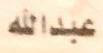

In [33]:
Image.open("/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0000466_9.jpeg")

In [25]:
file_path = "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/train22.txt"

def find_unexpected_lines(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
        lines = file.readlines()

    unexpected_lines = []

    for i in range(len(lines)):
        line = lines[i].strip()

        # Check if the line has the unexpected format
        if "/ad/" in line:
            unexpected_lines.append((i + 1, line))

    return unexpected_lines

unexpected_lines = find_unexpected_lines(file_path)

if unexpected_lines:
    print("Lines with unexpected format:")
    for line_number, line_content in unexpected_lines:
        print(f"Line {line_number}: {line_content}")
else:
    print("No lines with unexpected format found.")


Lines with unexpected format:
Line 58646: /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003554_6.jpeg	٢٠٩٣٤٨٦٦٢/ad/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003554_7.jpeg	مكان
Line 59060: /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003581_23.jpeg	الوطني/ad/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003583_0.jpeg	بدون
Line 59266: /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003594_6.jpeg	ب/ad/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003594_7.jpeg	تركي
Line 60611: /additional

In [26]:
file_path = "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/train22.txt"

def fix_unexpected_lines(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
        lines = file.readlines()

    fixed_lines = []

    for i in range(len(lines)):
        line = lines[i]

        # Fix lines with the unexpected format
        if "/ad/additional_drive" in line:
            # Check if there is a newline character before "/ad/additional_drive"
            if not line.startswith("\n"):
                line = "\n" + line

            # Replace "/ad/additional_drive" with "/additional_drive"
            line = line.replace("/ad/additional_drive", "/additional_drive")

        fixed_lines.append(line)

    return fixed_lines

fixed_lines = fix_unexpected_lines(file_path)

# Write the fixed lines to a new file
output_file_path = "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/fixed_train.txt"
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.writelines(fixed_lines)

print(f"Fixed text has been written to: {output_file_path}")


Fixed text has been written to: /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/fixed_train.txt


In [27]:
cat /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/fixed_train.txt  | head -5

/bin/bash: /var/anaconda3/envs/Abinet_new/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0000000_0.jpeg	الجنسية
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0000000_1.jpeg	الجنس
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0000000_2.jpeg	السعودية
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0000000_3.jpeg	ذكر
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0000000_4.jpeg	تاريخ
cat: write error: Broken pipe


In [28]:
import os

file_path = "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/fixed_train.txt"

def check_image_existence(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
        lines = file.readlines()

    non_existent_images = []

    for line in lines:
        # Split the line into image path and label
        parts = line.strip().split('\t')

        # Check if the line has the expected format
        if len(parts) == 2:
            image_path, _ = parts

            # Check if the image file exists
            if not os.path.exists(image_path):
                non_existent_images.append(image_path)

    return non_existent_images

non_existent_images = check_image_existence(file_path)

if non_existent_images:
    print(f"Number of non-existent images: {len(non_existent_images)}")
    print("Non-existent images:")
    for image_path in non_existent_images:
        print(image_path)
else:
    print("All images exist.")


Number of non-existent images: 2607
Non-existent images:
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003518_22.jpeg
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003527_41.jpeg
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003527_42.jpeg
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003533_21.jpeg
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003536_5.jpeg
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003536_9.jpeg
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOC

In [29]:
cat "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/fixed_train.txt" | wc -l

/bin/bash: /var/anaconda3/envs/Abinet_new/lib/libtinfo.so.6: no version information available (required by /bin/bash)
154639


In [31]:
import os

file_path = "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/fixed_train.txt"

def filter_existing_images(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
        lines = file.readlines()

    valid_lines = []

    for line in lines:
        parts = line.strip().split('\t')

        if len(parts) == 2:
            image_path, _ = parts

            if os.path.exists(image_path):
                valid_lines.append(line)

    return valid_lines

valid_lines = filter_existing_images(file_path)

with open(file_path, 'w', encoding='utf-8') as file:
    file.writelines(valid_lines)

print("Lines with existing images are written back to the file.")


Lines with existing images are written back to the file.


In [21]:
cat /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/fixed_train.txt  | wc -l

/bin/bash: /var/anaconda3/envs/Abinet_new/lib/libtinfo.so.6: no version information available (required by /bin/bash)
151812


In [32]:
cat /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/fixed_train.txt | wc -l

/bin/bash: /var/anaconda3/envs/Abinet_new/lib/libtinfo.so.6: no version information available (required by /bin/bash)
151366


In [30]:
cat /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/train.txt | head -5

/bin/bash: /var/anaconda3/envs/Abinet_new/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0000000_0.jpeg	الجنسية
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0000000_1.jpeg	الجنس
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0000000_2.jpeg	السعودية
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0000000_3.jpeg	ذكر
/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0000000_4.jpeg	تاريخ
cat: write error: Broken pipe


In [23]:
import os

images_folder = "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/"
file_path = "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/fixed_train.txt"

# Function to get a set of image names from the text file
def get_image_names_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
        lines = file.readlines()

    image_names = {line.strip().split('\t')[0].split('/')[-1] for line in lines if '\t' in line}

    return image_names

# Function to count images not present in the text file
def count_images_not_in_file(images_folder, image_names_in_file):
    count = 0
    for filename in os.listdir(images_folder):
        if filename not in image_names_in_file:
            count += 1

    return count

# Get unique image names from the text file
image_names_in_file = get_image_names_from_file(file_path)

# Count images not present in the text file
num_images_not_in_file = count_images_not_in_file(images_folder, image_names_in_file)

print(f"Number of images not present in the text file: {num_images_not_in_file}")


Number of images not present in the text file: 0


In [18]:
import os

images_folder = "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/"
file_path = "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/train.txt"

# Function to get a set of image names from the text file
def get_image_names_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
        lines = file.readlines()

    image_names = {line.strip().split('\t')[0].split('/')[-1] for line in lines if '\t' in line}

    return image_names

# Function to remove images not present in the text file
def remove_images_not_in_file(images_folder, image_names_in_file):
    for filename in os.listdir(images_folder):
        if filename not in image_names_in_file:
            image_path = os.path.join(images_folder, filename)
            os.remove(image_path)
            print(f"Removed: {image_path}")

# Get unique image names from the text file
image_names_in_file = get_image_names_from_file(file_path)

# Remove images not present in the text file
remove_images_not_in_file(images_folder, image_names_in_file)

print("Image cleanup completed.")


Image cleanup completed.


In [19]:
cat /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/train.txt | wc -l

/bin/bash: /var/anaconda3/envs/Abinet_new/lib/libtinfo.so.6: no version information available (required by /bin/bash)
153742


In [20]:
ls /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr | wc -l

/bin/bash: /var/anaconda3/envs/Abinet_new/lib/libtinfo.so.6: no version information available (required by /bin/bash)
153733


In [31]:


import os

file_path = "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/train22.txt"

count_non_existing = 0

# Read the text file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Extract the image path from each line
        image_path = line.split('\t')[0].strip()

        # Check if the file exists
        if not os.path.exists(image_path):
            print(f"File does not exist: {image_path}")
            count_non_existing += 1

# Print the count of non-existing files
print(f"Number of files that do not exist: {count_non_existing}")


File does not exist: /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003518_22.jpeg
File does not exist: /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003527_41.jpeg
File does not exist: /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003527_42.jpeg
File does not exist: /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003533_21.jpeg
File does not exist: /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003536_5.jpeg
File does not exist: /additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/images_arr/0003536_9.jpeg


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 5018: invalid continuation byte

In [24]:
file_path = "/additional_drive/ibrar/dataset/Paddle_dataset/updated_clean_paddleOCR/final_Paddle_clean_dataset/updated_CLEAN_29_Nov/backup_5_dec/train_modified.txt"

def find_unexpected_lines(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
        lines = file.readlines()

    unexpected_lines = []

    for i in range(len(lines)):
        line = lines[i].strip()

        # Check if the line has the unexpected format
        if "/ad/" in line:
            unexpected_lines.append((i + 1, line))

    return unexpected_lines

unexpected_lines = find_unexpected_lines(file_path)

if unexpected_lines:
    print("Lines with unexpected format:")
    for line_number, line_content in unexpected_lines:
        print(f"Line {line_number}: {line_content}")
else:
    print("No lines with unexpected format found.")


No lines with unexpected format found.
